In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = 'TATAMOTORS.NS'
start = "2018-01-01"
end = "2023-10-30"

In [3]:
df = yf.download(ticker, start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,430.950012,436.399994,422.250000,424.450012,423.131256,6807536
2018-01-02,428.850006,440.850006,422.000000,439.299988,437.935089,15331261
2018-01-03,440.399994,441.399994,431.950012,433.899994,432.551849,9794953
2018-01-04,430.000000,433.299988,425.750000,429.950012,428.614166,8395377
2018-01-05,431.250000,436.350006,429.799988,431.600006,430.259033,7021611
...,...,...,...,...,...,...
2023-10-20,666.650024,676.400024,660.500000,663.200012,663.200012,11759568
2023-10-23,663.650024,667.250000,645.000000,647.349976,647.349976,8564004
2023-10-25,650.000000,651.900024,636.049988,637.849976,637.849976,8229559


In [4]:
data = df['Close']
print(data.values)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))
data

[424.45001221 439.29998779 433.8999939  ... 637.84997559 626.54998779
 641.04998779]


array([[0.59511188],
       [0.6197183 ],
       [0.61077051],
       ...,
       [0.9487158 ],
       [0.92999171],
       [0.95401823]])

In [5]:
training_data_len = int(len(data) * 0.8)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1151, 288)

In [6]:
print("Training Data Type:", type(training_data))
print("Training Data Size:", training_data.size)
print("Training Data Shape", training_data.shape) 
print("Training Data Dimension:", training_data.ndim)
print("Training Data:",training_data)
# print("Testing Data:", testing_data)

Training Data Type: <class 'numpy.ndarray'>
Training Data Size: 1151
Training Data Shape (1151, 1)
Training Data Dimension: 2
Training Data: [[0.59511188]
 [0.6197183 ]
 [0.61077051]
 ...
 [0.65269266]
 [0.66238607]
 [0.64299919]]


In [7]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 9s 11ms/step - loss: 0.1313
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0883
Epoch 3/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0556
Epoch 4/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0390
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0403
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0383
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0338
Epoch 8/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0310
Epoch 9/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0266
Epoch 10/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0209
Epoch 11/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0141
Epoch 12/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0067
Epoch 13/200
6/6 [==============================] 

6/6 [==============================] - 0s 12ms/step - loss: 1.8565e-04
Epoch 100/200
6/6 [==============================] - 0s 13ms/step - loss: 1.8656e-04
Epoch 101/200
6/6 [==============================] - 0s 13ms/step - loss: 1.9284e-04
Epoch 102/200
6/6 [==============================] - 0s 17ms/step - loss: 1.9167e-04
Epoch 103/200
6/6 [==============================] - 0s 18ms/step - loss: 1.8407e-04
Epoch 104/200
6/6 [==============================] - 0s 17ms/step - loss: 1.8067e-04
Epoch 105/200
6/6 [==============================] - 0s 17ms/step - loss: 1.7985e-04
Epoch 106/200
6/6 [==============================] - 0s 21ms/step - loss: 1.8275e-04
Epoch 107/200
6/6 [==============================] - 0s 16ms/step - loss: 1.8348e-04
Epoch 108/200
6/6 [==============================] - 0s 9ms/step - loss: 1.9127e-04
Epoch 109/200
6/6 [==============================] - 0s 13ms/step - loss: 1.8314e-04
Epoch 110/200
6/6 [==============================] - 0s 14ms/step - loss: 1.7859

6/6 [==============================] - 0s 10ms/step - loss: 1.8378e-04
Epoch 196/200
6/6 [==============================] - 0s 12ms/step - loss: 1.8269e-04
Epoch 197/200
6/6 [==============================] - 0s 11ms/step - loss: 1.7957e-04
Epoch 198/200
6/6 [==============================] - 0s 12ms/step - loss: 1.8230e-04
Epoch 199/200
6/6 [==============================] - 0s 16ms/step - loss: 1.7842e-04
Epoch 200/200
6/6 [==============================] - 0s 12ms/step - loss: 1.7747e-04


In [9]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [10]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [11]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 5.584837201989217
Root Mean Squared Error (RMSE): 8.262763738860743


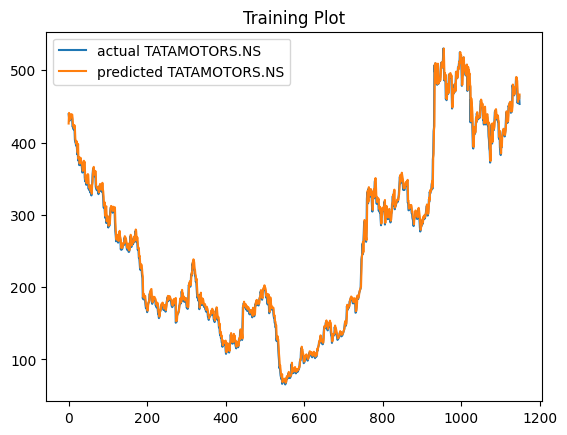

In [12]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 6.181384362410174
Root Mean Squared Error (RMSE): 8.198393121879173


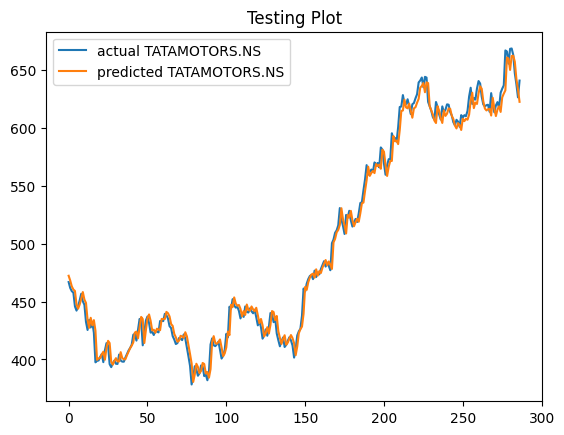

In [13]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

In [14]:
y_test[-1]

641.0499877929688

In [15]:
pred[-1]

array([622.68646], dtype=float32)

In [16]:
future_start="2023-11-01"
future_end="2023-12-10"

future_data = yf.download(ticker, start=future_start, end=future_end)
future_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,630.000000,633.799988,626.299988,627.700012,627.700012,8785264
2023-11-02,632.000000,638.200012,630.099976,636.450012,636.450012,9934305
2023-11-03,662.000000,666.000000,646.200012,647.500000,647.500000,23087856
2023-11-06,652.849976,652.849976,643.200012,646.049988,646.049988,10801301
2023-11-07,645.000000,649.900024,643.299988,645.000000,645.000000,6588073
2023-11-08,648.000000,649.049988,641.900024,642.549988,642.549988,6551864
2023-11-09,644.000000,653.650024,642.700012,649.349976,649.349976,10155047
2023-11-10,649.349976,652.950012,644.000000,651.049988,651.049988,6425792
2023-11-13,653.000000,654.000000,649.299988,653.250000,653.250000,3279829


In [17]:
future_data = np.array(future_data['Close'])
len(future_data)

26

In [18]:
print(type(future_data))
# x = future_data.reshape(-1, 1)
# print(x)
# scaler.transform(x)

<class 'numpy.ndarray'>


In [19]:
def predict_future(days, last_input, future_data):
    Output = []
    i = 0
    temp = scaler.transform(future_data.reshape(-1, 1))
    
    while(i<days):
        if(len(last_input)>past_values):
            last_input = last_input[1:]
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            last_input = last_input[1:]
            Output.extend(res.tolist())
            i=i+1
        else:
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            Output.extend(res.tolist())
            i=i+1
        
    Output = scaler.inverse_transform(Output)
    return Output, last_input
    
future_predictions, last_input = predict_future(len(future_data), X_test[-1], future_data)
future_predictions = future_predictions.flatten()

1/1 [==============================] - 0s 49ms/step


In [20]:
days=list(range(1,len(future_data)+1))

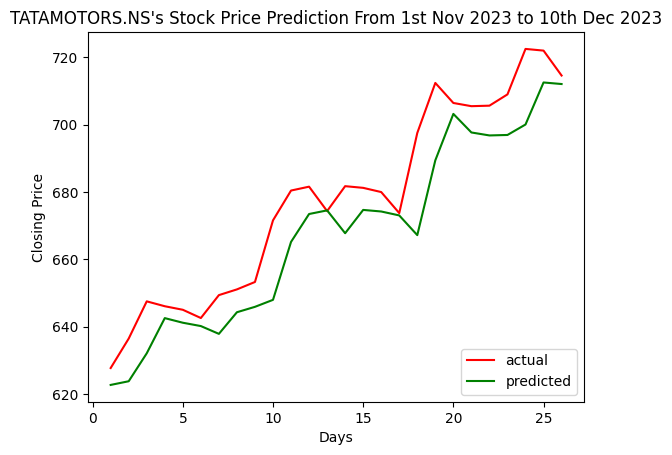

In [21]:
plt.title(f"{ticker}'s Stock Price Prediction From 1st Nov 2023 to 10th Dec 2023")
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(days,future_data, label = 'actual', color='red')
plt.plot(days,future_predictions, label = 'predicted', color='green')
plt.legend(loc='lower right')
plt.show()

In [22]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [23]:
controls_actual = get_control_vector(future_data)
amount_actual = buy_and_sell_bot(future_data, controls_actual)

In [24]:
controls_pred= get_control_vector(future_predictions)
amount_pred = buy_and_sell_bot(future_predictions, controls_pred)

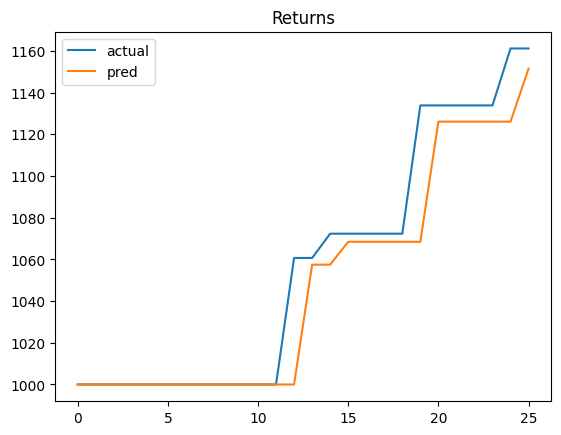

In [25]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()